In [1]:
# import required Python libraries

# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset

filename = "c:/datasets/machine.data.csv"

df = pd.read_csv(filename, header = None)

In [3]:
# view the dimensions of dataframe df

print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (209, 10)


We can see that there are 209 rows and 10 columns in the dataset. Next, we should get an insight about the dataset.

The **df.head()** function helps us to visualize the first 5 rows of the dataset.

In [4]:
# view the top five rows of dataframe df

df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


We can see that the column names are from 0 to 9. They should be descriptive. So, we should rename them as follows:-

In [5]:
# rename columns of dataframe df

col_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP' ]

df.columns = col_names

We should now check that the columns have appropriate names.

In [6]:
# view the top five rows of dataframe with column names renamed

df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


First, let's view a concise summary of the dataframe with **df.info()** method.

In [7]:
# view dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
Vendor Name    209 non-null object
Model Name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


We can see that there are categorical and numerical variables in the dataset. Numerical variables have data types int64 and categorical variables are those of type object.

First, let's explore the categorical variables.

In [8]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [9]:
# view the categorical variables

print(categorical)

['Vendor Name', 'Model Name']


So, there are two categorical variables - **Vendor Name** and **Model Name** in the dataset. 

Let's explore more about them. 

In [10]:
# view the top five rows of categorical variables

df[categorical].head()

,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [11]:
# exploring the categories in Vendor Name column

df['Vendor Name'].value_counts()

ibm             32
nas             19
ncr             13
honeywell       13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
harris           7
dg               7
hp               7
ipl              6
c.r.d            6
dec              6
magnuson         6
formation        5
cambex           5
prime            5
nixdorf          3
gould            3
perkin-elmer     3
apollo           2
wang             2
bti              2
basf             2
microdata        1
adviser          1
four-phase       1
sratus           1
Name: Vendor Name, dtype: int64

ibm is the most frequent category in the **Vendor Name** column.

Next, let's explore the **Model Name** column.

In [12]:
print('Number of unique Model Names: ', len(df['Model Name'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  209
Number  of instances of models:  209


We can see that **Model Name** is a unique identifier for each of the computer models. Thus this is not a variable that we can use to predict the estimated relative performance of computer models. So, we should not use this column for model building.


Now, let's explore the numerical variables.

In [13]:
# find numerical variables

numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 8 numerical variables


In [14]:
# view numerical variables

print(numerical)

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


So, there are eight numerical variables in the dataset. Let's explore more about them.

In [15]:
# view the top 5 rows of numerical variables

df[numerical].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


We can see that we have eight numerical variables in the dataset. All the eight numerical variables are of discrete type.

On closer inspection, we find that **PRP** is a redundant column in the dataframe. It denotes **published relative performance**. Our target is to predict **estimated relative performance**. So, we should delete **PRP** from the dataframe.

**Summary : types of variables**


- There are 2 categorical variables and 8 numerical variables.

- The 2 categorical variables, **Vendor Name** and **Model Name** are 2 non-predictive attributes as given in the dataset description. So, I do not use them for model building.

- All of the 8 numerical variables are of discrete type.

- Out of the 8 numerical variables, **PRP** is the linear regression's guess. It is redundant column. I do not use it for model building.

- **ERP** (estimated relative performance is the goal field). It is the target variable.

### Estimate correlation coefficients


Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. 

We can compute it using the `df.corr()` method as follows:-

In [16]:
# estimate correlation coefficients

pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


In [17]:
corr_matrix['ERP'].sort_values(ascending=False)

ERP      1.0000
PRP      0.9665
MMAX     0.9012
MMIN     0.8193
CACH     0.6486
CHMIN    0.6106
CHMAX    0.5922
MYCT    -0.2884
Name: ERP, dtype: float64

**Interpretation of correlation coefficient**

The correlation coefficient ranges from -1 to +1. 

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between `ERP` and `MMAX`. 


When it is clsoe to -1, it means that there is a strong negative correlation. So, there is a small negative correlation between `ERP` and `MYCT`.


### Correlation heat map

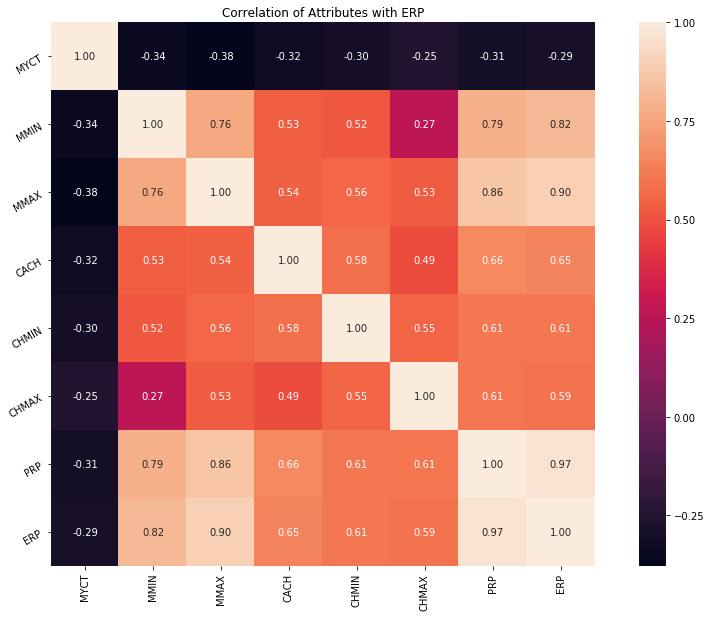

In [18]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with ERP')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

We can see that **ERP** is positively correlated with **MMIN**, **MMAX**, **CACH**, **CHMIN** and **CHMAX**.

Also, there is a strong positive correlation between **ERP** and **MMIN** and also between **ERP** and **MMAX**.

## 10. Detect problems within variables

### Detect missing values

In [19]:
# let's visualise the number of missing values
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

We can confirm that there are no missing values in the dataset.

### Outliers in discrete variables

In [20]:
# let's view the summary statistics of the dataset
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000
mean,203.8230,"2,867.9809","11,796.1531",25.2057,4.6986,18.2679,105.6220,99.3301
std,260.2629,"3,878.7428","11,726.5644",40.6287,6.8163,25.9973,160.8307,154.7571
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,50.0000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,113.0000,101.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [21]:
# outlies in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

50     0.1196
140    0.0431
300    0.0383
26     0.0383
38     0.0335
320    0.0335
56     0.0335
180    0.0335
800    0.0287
75     0.0287
105    0.0287
200    0.0287
143    0.0239
900    0.0239
160    0.0239
400    0.0191
60     0.0191
29     0.0191
25     0.0191
23     0.0191
110    0.0191
92     0.0144
100    0.0144
250    0.0144
115    0.0144
125    0.0144
30     0.0144
480    0.0144
225    0.0144
330    0.0144
810    0.0096
1500   0.0096
72     0.0096
40     0.0096
57     0.0096
59     0.0096
17     0.0096
133    0.0096
1100   0.0096
240    0.0096
700    0.0096
64     0.0048
220    0.0048
203    0.0048
185    0.0048
175    0.0048
167    0.0048
35     0.0048
150    0.0048
116    0.0048
124    0.0048
70     0.0048
48     0.0048
112    0.0048
52     0.0048
98     0.0048
350    0.0048
600    0.0048
84     0.0048
90     0.0048
Name: MYCT, dtype: float64

2000    0.2584
1000    0.1818
4000    0.1053
512     0.1053
8000    0.0957
256     0.0622
768     0.0478
16000   0.0335
262     0.00

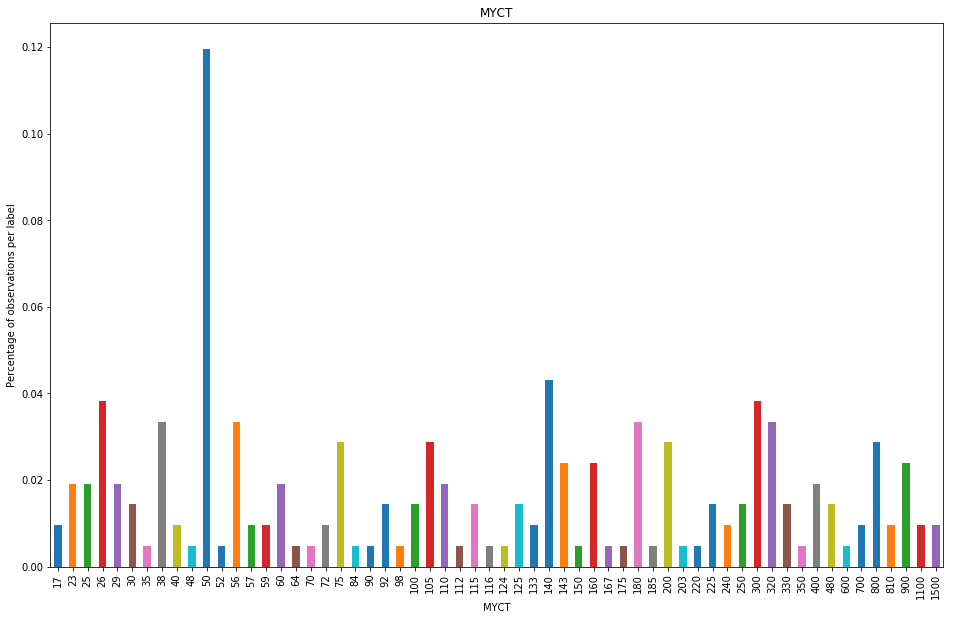

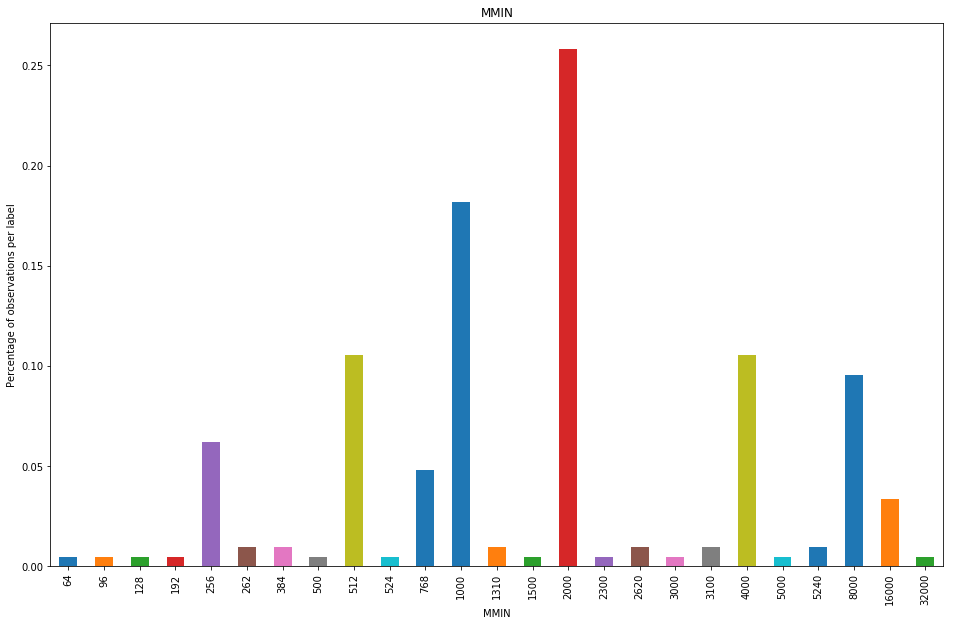

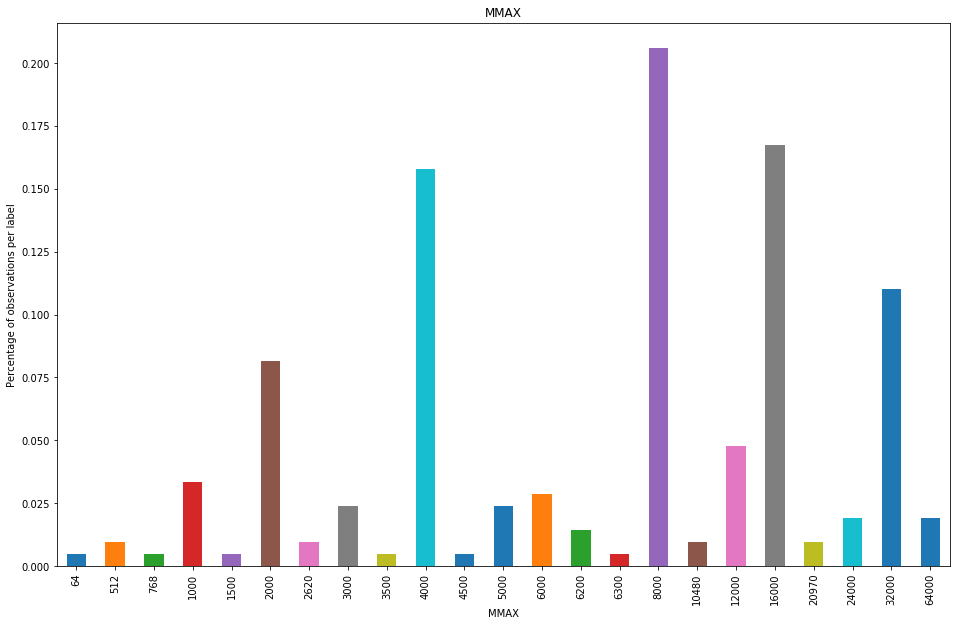

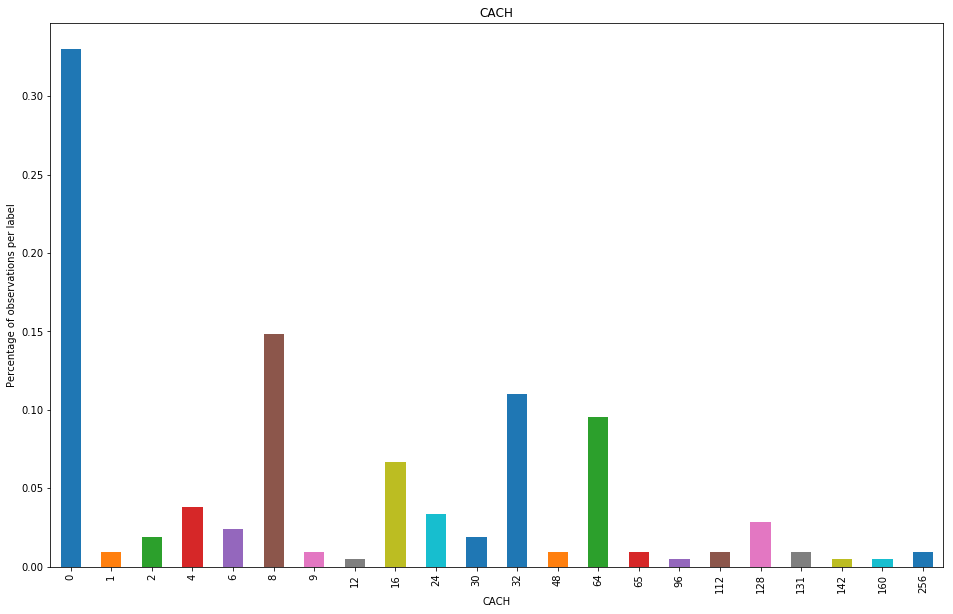

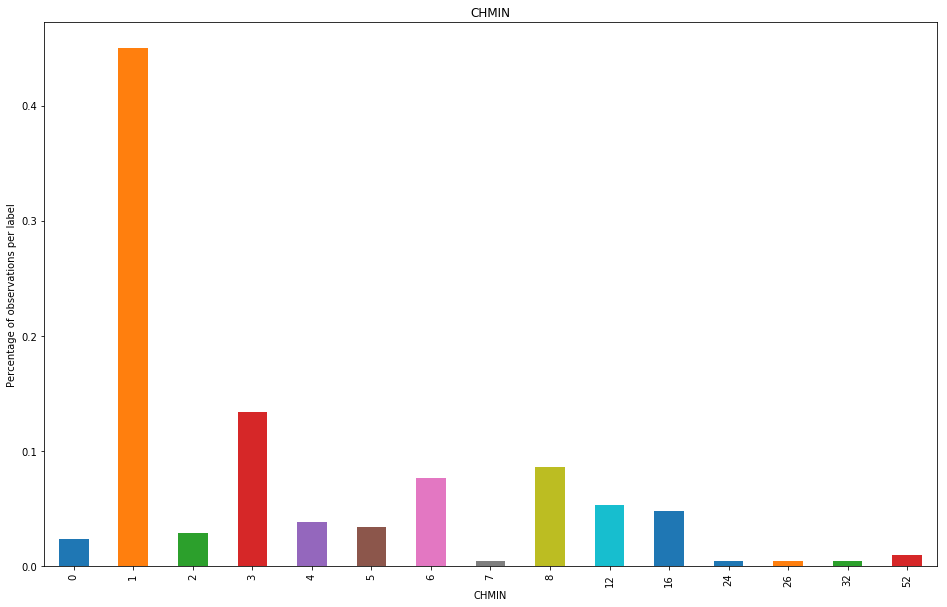

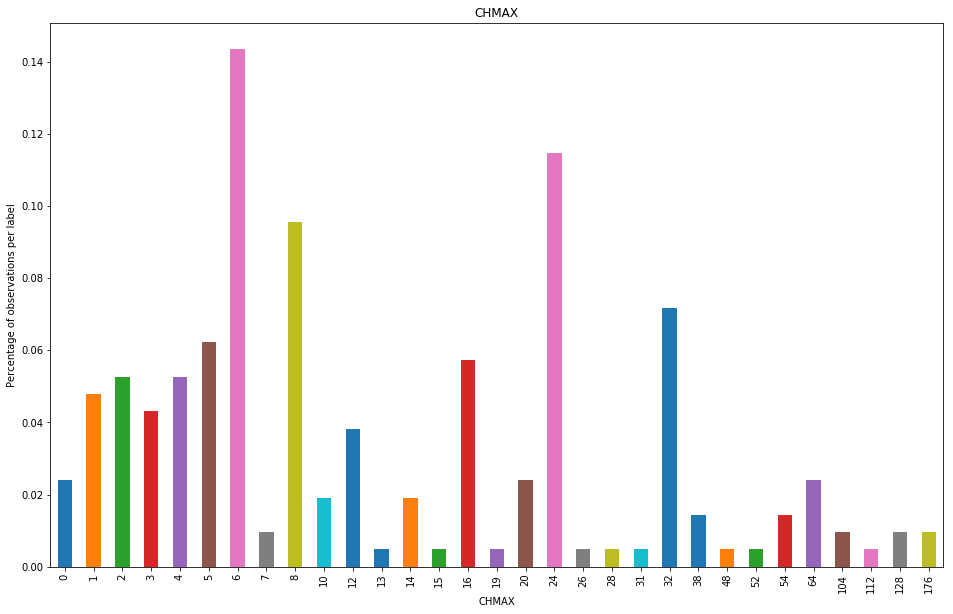

In [22]:
# detect outliers in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

From the above plot, we can see that the discrete variables show values that are shared by a tiny proportion of variable values
in the dataset. For linear regression modeling, this does not cause any problem.

### Number of labels: cardinality

Now, I will examine the categorical variable **Vendor Name**. First I will determine whether it show high cardinality. This is a high number of labels.

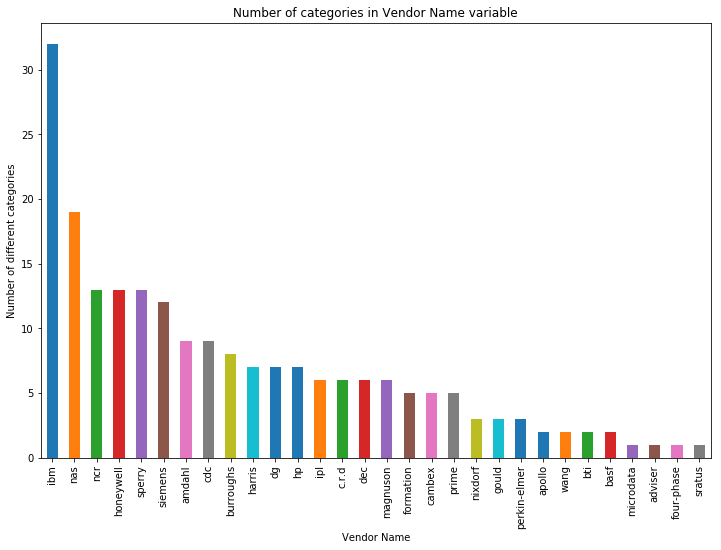

In [23]:
# plot the categorical variable

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()


We can see that the **Vendor Name** variable, contain only a few labels. So, we do not have to deal with high cardinality.

## 11. Linear Regression Modeling


Now, I discuss the most important part of this project which is the Linear Regression model building. 

First of all, I will divide the dataset into categorical and numerical variables as follows:-

### Divide the dataset into categorical and numerical variables



In [24]:
df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]

In [25]:
df_num.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


### Select the predictor and target variables


In [26]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

### Create separate train and test sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

### View the dimensions of X_train, X_test, y_train, y_test

In [28]:
X_train.shape, y_train.shape

((146, 6), (146,))

In [29]:
X_test.shape, y_test.shape

((63, 6), (63,))

In [30]:
# let's inspect the training dataframe

X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
61,800,256,8000,0,1,4
24,320,128,6000,0,1,12
30,25,1310,2620,131,12,24
60,800,256,8000,0,1,4
56,220,1000,8000,16,1,2


In [31]:
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,205.8082,"2,799.9726","11,741.2055",25.5685,4.5479,19.2397
std,249.6152,"3,865.5077","11,879.6456",41.6903,6.5770,28.8810
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,512.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,115.5000,"2,000.0000","8,000.0000",8.0000,1.5000,8.0000
75%,240.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000


### Feature Scaling


In [32]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)




The scaler is now ready, we can use it in a machine learning algorithm when required.

### Fit the Linear Regression model

In [33]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 12. Predicting the results


I have built the linear regression model. Now it is time to predict the results.

### Predicting the test set results

In [34]:
# Predict on the test data set
y_pred = lr.predict(X_test)

### Predicting estimated relative CPU performance values

In [35]:
#print("Predicted ERP - estimated relative performance for the first five values")

lr.predict(X_test)[0:5]

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392])

## 13. Model slope and intercept terms

The slope parameters(w) are also called weights or coefficients. They are stored in the **coef_** attribute.

The offset or intercept(b) is stored in the **intercept_** attribute.

So, the model slope is given by **lr.coef_** and model intercept term is given by **lr.intercept_**.

In [36]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 6
Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


I constructed a dataframe that contains features and estimated coefficients. 

In [37]:
dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,17.7020
1,59.1124
2,78.3504
3,16.5398
4,-0.3541
5,38.9726


In [39]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.92


In [40]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

Training set score: 0.91


In [41]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Test set score: 0.92


In [42]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)


In [43]:
# print the 5-fold cross-validation scores
print(cv_scores.round(4))

[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [44]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.4691


**Interpretation**

There is a large fluctuation in the cross validation scores of the model. 

The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

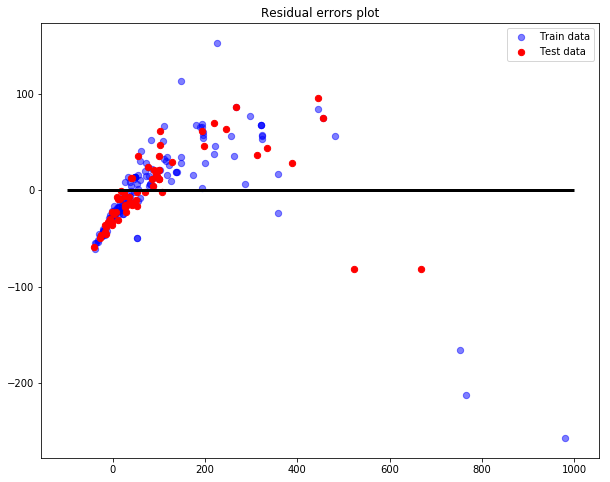

In [45]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()